In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

netflix_df = pd.read_csv('NetflixOriginals.csv', encoding='latin-1')
netflix_df.columns = [ column.lower()  for column in netflix_df.columns]
netflix_df.head()

,title,genre,premiere,runtime,imdb score,language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.500,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.600,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.600,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.200,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.400,Hindi


In [31]:
shape_of_df = netflix_df.shape
print("Total Rows",shape_of_df[0])
print("Total Columns",shape_of_df[1])

Total Rows 584
Total Columns 6


Checking for Null in dataset

In [32]:
check_for_null =  netflix_df.isnull().values.any()
null_value = check_for_null.sum()
if null_value == 0:
    print("No Null Value")
else:
    print(netflix_df[check_for_null])
    

No Null Value


In [ ]:



def check_dataframe(dataframe, head=5):  
    print('**************-SHAPE-**************')
    print(dataframe.shape)
    print('\n**************-DTYPES-**************')
    print(dataframe.dtypes)
    print('\n**************-HEAD-**************')
    print(dataframe.head(head))
    print('\n**************-TAIL-**************')
    print(dataframe.tail(head))
    print('\n**************-INFO-**************')
    print(dataframe.info())
    print('\n**************-COLUMNS-**************')
    print(dataframe.columns)
    print('\n**************-INDEX-**************')
    print(dataframe.index)
    print('\n**************-IS THERE ANY NULL VALUE?-**************')
    print(dataframe.isnull().values.any())
    print('\n**************-NAN NUMBERS-**************')
    print(dataframe.isnull().sum())
    print('\n**************-DESCRIPTIVE STATISTICS-**************')
    print(dataframe.describe(include='all'))

check_dataframe(netflix_df)
    

Describing Categorical Values and Numerical Values
1. Title -  its an nominal categorical variable
2. genre - its an nominal categorical variable
3. premiere - its an ordinal categorical variable
4. runtime - its an continous numercial variable
5. score - its an numerical variable
6. language - its an nominal categorical variable

change data type of premiere column to datetime

In [37]:
netflix_df.premiere = pd.to_datetime(netflix_df.premiere)
netflix_df.head()

,title,genre,premiere,runtime,imdb score,language
0,Enter the Anime,Documentary,2019-08-05,58,2.500,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.600,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.600,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.200,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.400,Hindi


In [ ]:
Individual Variables
Language
start with the language variable. The table that follows gives the count of films in each language.

In [125]:

top_4_language = netflix_df.language.value_counts().head(4)
multiple_languages = netflix_df.language[netflix_df.language.str.contains('/')]
top_4_language['Multiple Languages'] = multiple_languages.count()
others_language = netflix_df.language[~netflix_df.language.isin(top_4_language.index[:4])].count()
single_language = others_language - top_4_language['Multiple Languages']
single_language
top_4_language['Single Language'] = single_language
top_language_df = top_4_language.to_frame().reset_index()
top_language_df.rename(columns={'index':'language','language':'count'},inplace=True)
top_language_df


,language,count
0,English,401
1,Hindi,33
2,Spanish,31
3,French,20
4,Multiple Languages,23
5,Single Language,76


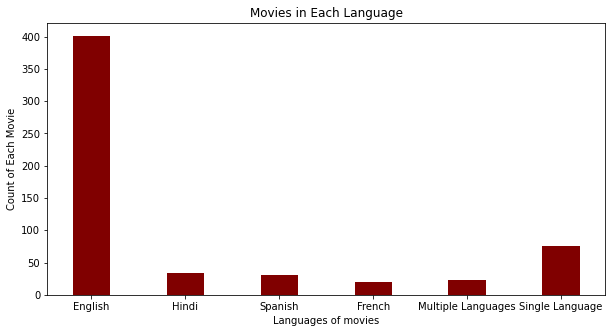

In [118]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(top_language_df['language'], top_language_df['count'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Languages of movies")
plt.ylabel("Count of Each Movie")
plt.title("Movies in Each Language")
plt.show()

Descriptive Stats for Language , to find out what proportion of films are english among other movies

In [150]:
total_observations = sum(top_language_df['count'])
proportions_of_english_movies = int(top_language_df.iloc[0][1] )/ int(total_observations)
print("{}% movies are in english among others".format(round(proportions_of_english_movies*100)))




69% movies are in english among others


What is the ratio of English-language films to films in a single language that is NOT English?

In [156]:
total_obeservations_not_english = sum(top_language_df['count'][1:])
proportion = total_observations/total_obeservations_not_english
print("These means there are "+ str(round(proportion))+ " English films for every non english films")

These means there are 3 English films for every non english films


What proportion of the films has multiple primary languages?

In [163]:
total_obeservations_multiple_languages = top_language_df.iloc[4][1]
proportion_of_mutiple = total_obeservations_multiple_languages/total_observations
print("{}% movies have multiple primary languages".format(round(proportion_of_mutiple*100)))

23
4% movies have multiple primary languages


The majority of the Netflix films in the dataset have English as their primary language. With 401 English-language films out of a total of 584, this is about 69% of the films. Further, there are about 3 English-language films for every non-English single-language film. Only about 4% of films have multiple primary languages.

IMDb Score  : a Numerical Variable
First we will do a visual summarization to analyze the imdb rating for movies

Text(0.5, 0, 'Score')

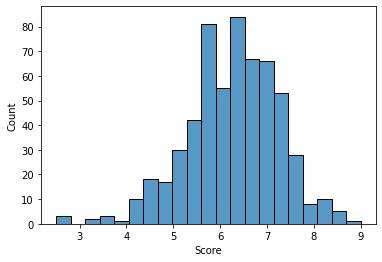

In [174]:
sns.histplot(x='imdb score', data = netflix_df)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Score')


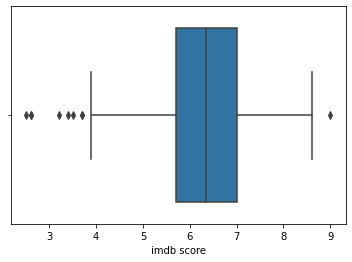

In [176]:
sns.boxplot(x='imdb score', data=netflix_df)
plt.show()
plt.close()

In [177]:
mean_of_imdb_score = netflix_df['imdb score'].mean()
median_of_imdb_score = netflix_df['imdb score'].median()
standard_deviation_of_imdb = netflix_df['imdb score'].std()
print("mean of imdb ",mean_of_imdb_score)
print("median of imdb ", median_of_imdb_score)
print("std of imdb ", standard_deviation_of_imdb)

mean of imdb  6.27174657534246
median of imdb  6.35
std of imdb  0.9792563938488804


The distribution of IMDb scores is mostly symmetrical in a bell shape, indicating a normal distribution. There are a couple of very low scores, but they are not far from the rest of the distribution, so they may not be extreme enough to be considered outliers. Since the distribution is fairly symmetrical, we can rely on the mean of 6.3 to give us a good idea of what a typical IMDb rating is. With a standard deviation of 1, we know there is some variation in scores, but most scores fall between 4 and 8 on the 1-10 scale.

Highest Scoring Films

In [198]:
top_5 = netflix_df['imdb score'].sort_values()[::-1][:5]
netflix_df.iloc[top_5.index]

,title,genre,premiere,runtime,imdb score,language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.000,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.600,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.500,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.400,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.400,English


Lowest Scoring Films

In [199]:
top_5 = netflix_df['imdb score'].sort_values()[::][:5]
netflix_df.iloc[top_5.index]

,title,genre,premiere,runtime,imdb score,language
0,Enter the Anime,Documentary,2019-08-05,58,2.500,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.600,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.600,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.200,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.400,Hindi


Genre:As we can see genre is a categorical variable of nominal type , as there can not be any order in the genre for its summary we will try to get its frequency distribution table with its relative frequency and will see it by plotting on bar graph ,,later on we can find out the mode of the genre for finding out which genre movies are most common


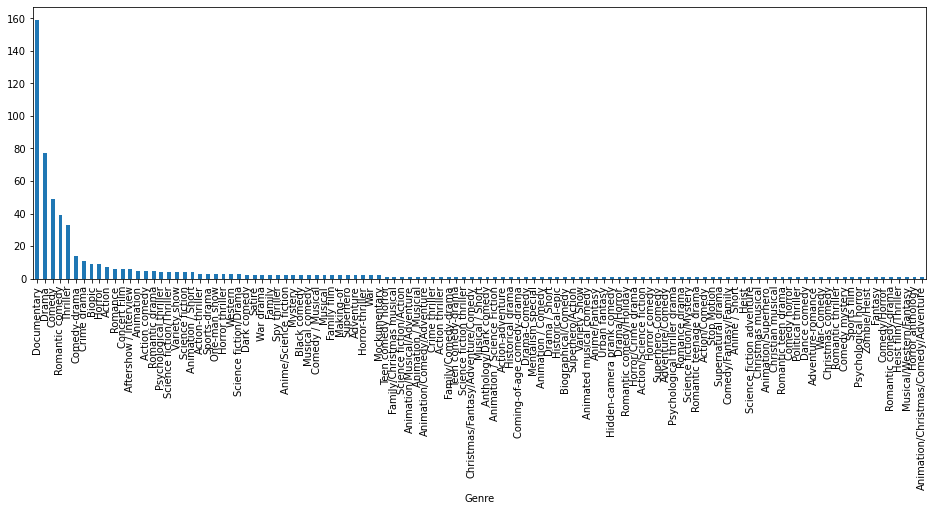

In [208]:
plt.figure(figsize=(16, 5))
netflix_df['genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show(block=True)

Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020

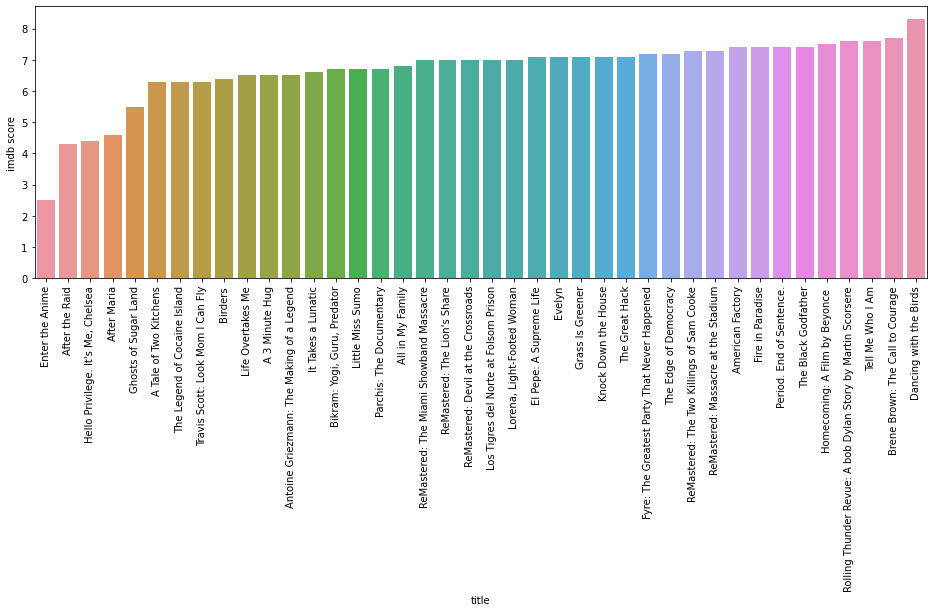

In [222]:
movies_between = netflix_df[(netflix_df.genre == 'Documentary') &  (netflix_df.premiere.between('01-01-2019','01-06-2020'))].sort_values('imdb score',ascending=True)
movies_between

plt.figure(figsize=(16,5))
sns.barplot(x=movies_between.title,y=movies_between['imdb score'],orient='v')
plt.xticks(rotation=90)
plt.show(block=True)




Which genre has the highest IMDB rating among movies shot in English?

In [238]:
genre_df = netflix_df[netflix_df.language == 'English'].sort_values('imdb score',ascending=False).head(10)
genre_df


,title,genre,premiere,runtime,imdb score,language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.000,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.500,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.400,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.400,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.300,English
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.300,English
574,Seaspiracy,Documentary,2021-03-24,89,8.200,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.200,English
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.200,English
571,13th,Documentary,2016-10-07,100,8.200,English


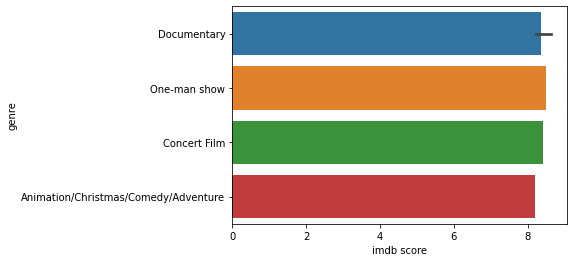

In [241]:
sns.barplot(y=genre_df.genre,x= genre_df['imdb score'])
plt.show(block=True)

What is the average 'runtime' of movies shot in "Hindi" language?

In [246]:
average_time = netflix_df[netflix_df.language == 'Hindi']['runtime'].mean()
average_time

115.78787878787878

How many categories does the "Genre" Column have, and what are those categories? Express it visually.

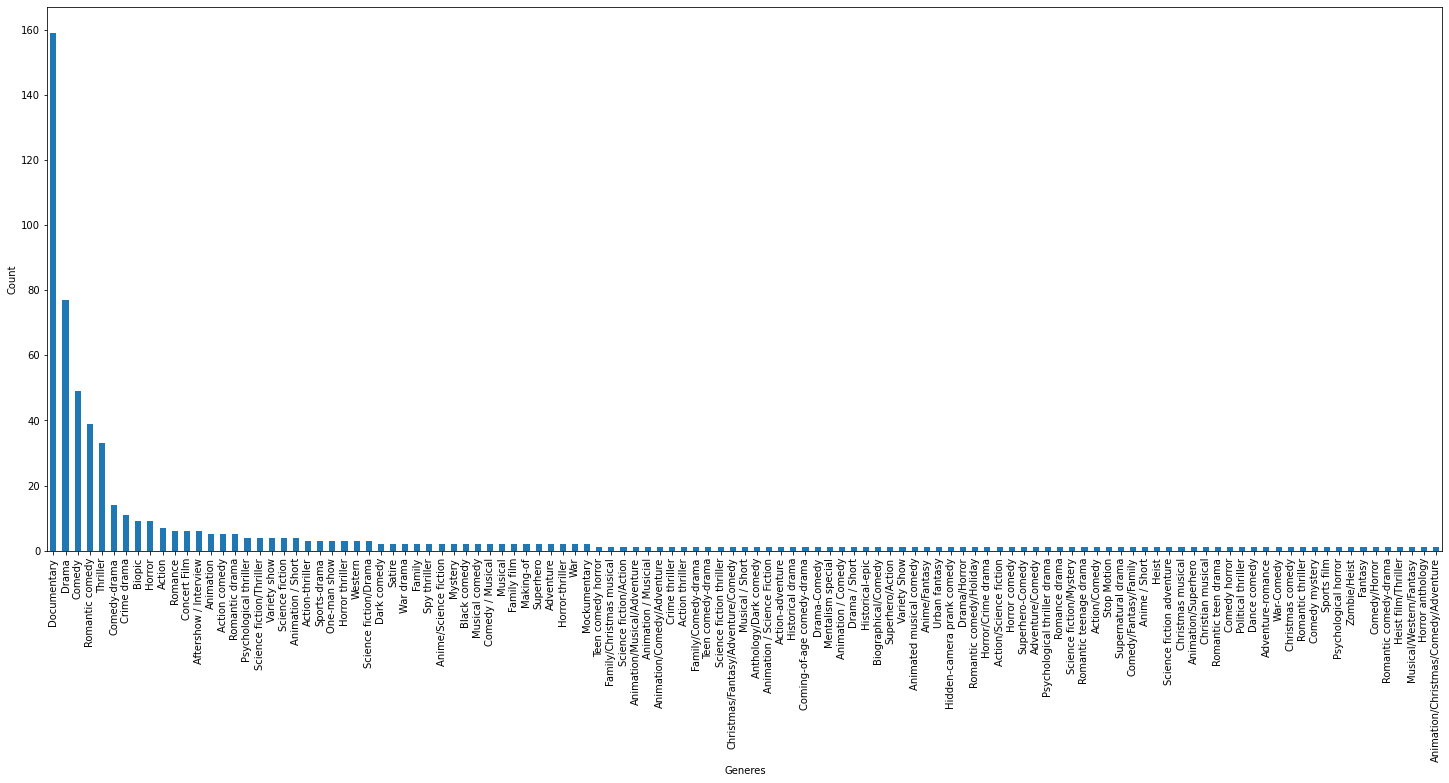

In [256]:

plt.figure(figsize=(25,10))
netflix_df.genre.value_counts().plot(kind='bar')
plt.xlabel('Generes')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show(block=True)


In [259]:
netflix_df.genre.value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: genre, Length: 115, dtype: int64

Find the 3 most used languages in the movies in the data set

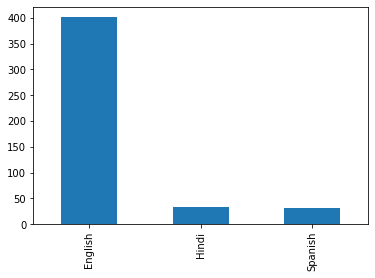

In [280]:
languages_distribution = netflix_df.language.value_counts()
top_3_languages = languages_distribution.head(3).plot(kind='bar')

plt.show(block=True)


What are the top 10 movies with the highest IMDB rating?

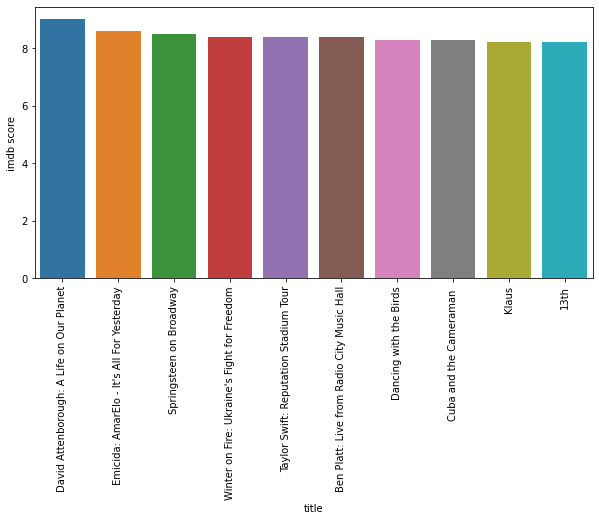

In [295]:
top_10_movies = netflix_df[['title','imdb score']].sort_values('imdb score',ascending=False).head(10)
top_10_movies
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_movies.title,y= top_10_movies['imdb score'])
plt.xticks(rotation= 90)
plt.show(block=True)

What is the correlation between IMDB score and 'Runtime'? Examine and visualize.

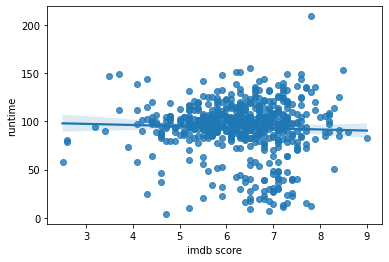

The correlation between runtime and imdb score is -0.041.


In [297]:
sns.regplot(x = netflix_df['imdb score'],y=netflix_df.runtime)
plt.xlabel('imdb score')
plt.ylabel('runtime')
plt.show(block=True)
x = round(netflix_df['imdb score'].corr(netflix_df['runtime']), 3)
print(f'The correlation between runtime and imdb score is {x}.')

Which are the top 10 'Genre' with the highest IMDB Score? Visualize it.

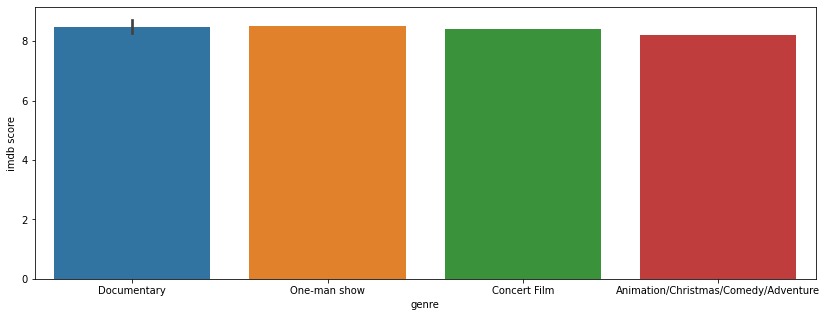

In [302]:
genre_and_score = netflix_df[['genre','imdb score']].sort_values('imdb score',ascending=False)
plt.figure(figsize=(14,5))
sns.barplot(x= genre_and_score.genre.head(10), y = genre_and_score['imdb score'])
plt.show(block=True)

What are the top 10 movies with the highest 'runtime'? Visualize it.

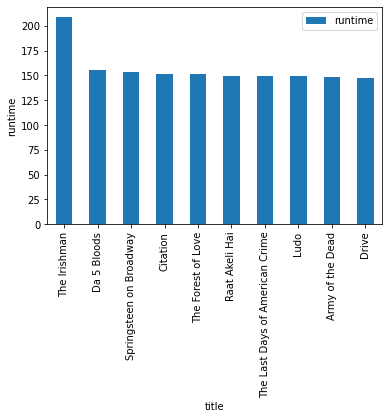

In [306]:
title_and_runtime = netflix_df[['title','runtime']].sort_values('runtime',ascending=False)
title_and_runtime.head(10).plot(x='title',y='runtime',kind='bar')
plt.xlabel('title')
plt.ylabel('runtime')
plt.show(block=True)

In which year was the most movies released? Visualize it.

In [335]:
netflix_df['year'] = netflix_df.premiere.dt.year
netflix_df.groupby(netflix_df.year)

,title,genre,premiere,runtime,imdb score,language
year,,,,,,
2014,1,1,1,1,1,1
2015,9,9,9,9,9,9
2016,30,30,30,30,30,30
2017,66,66,66,66,66,66
2018,99,99,99,99,99,99
2019,125,125,125,125,125,125
2020,183,183,183,183,183,183
2021,71,71,71,71,71,71


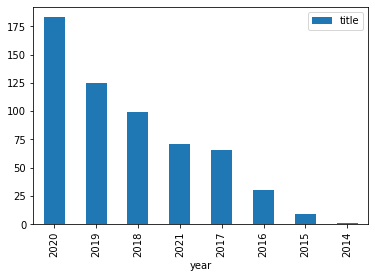

In [328]:
netflix_df['year'] = netflix_df.premiere.dt.year
netflix_df.groupby(netflix_df.year).title.count().reset_index().sort_values('title',ascending=False).plot(x='year',y='title' ,kind='bar')
plt.show(block=True)



Which language movies have the lowest average IMBD ratings? Visualize it.

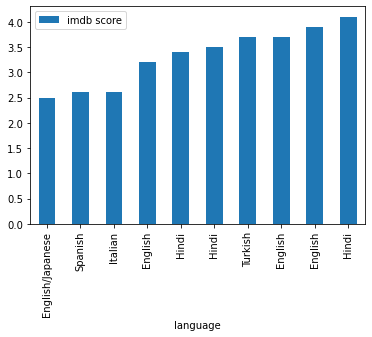

In [337]:
netflix_df[['language','imdb score']].sort_values('imdb score').head(10).plot(x='language',y='imdb score',kind='bar')
plt.show(block=True)


Which year has the greatest total runtime?

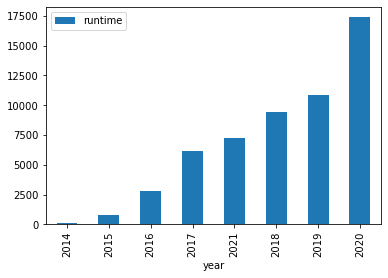

In [347]:
netflix_df.groupby(netflix_df.year,as_index=False).runtime.sum().sort_values('runtime',ascending=True).head(10).plot(
    x='year',y='runtime',kind='bar')
plt.show(block=True)

What is the "Genre" where each language is used the most?

In [357]:
netflix_df.groupby(netflix_df.genre).language.max()


genre
Action                       Hindi
Action comedy                Malay
Action thriller            English
Action-adventure    English/Korean
Action-thriller         Indonesian
                         ...      
War                        English
War drama             English/Akan
War-Comedy                 English
Western                 Portuguese
Zombie/Heist               English
Name: language, Length: 115, dtype: object

Is there any outlier data in the data set? Please explain.

In [358]:
netflix_df.columns

Index(['title', 'genre', 'premiere', 'runtime', 'imdb score', 'language', 'year'], dtype='object')